<a href="https://colab.research.google.com/github/tasosnikitakis/Data_Science_Notebooks/blob/main/pharmacy_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as ptx

#Dataframes Creation

In [2]:
sales_df = pd.read_excel("/content/drive/MyDrive/pharmacy_data/Sales Data Current.xlsx")

In [3]:
sales_df.head()

,DATE,Z,ΠΕΛΑΤΕΣ
0,03/01/2020,619.33,54
1,07/01/2020,585.32,44
2,08/01/2020,377.37,31
3,09/01/2020,498.73,40
4,10/01/2020,484.16,40


#Data Exploration

In [4]:
sales_df.describe()

,Z,ΠΕΛΑΤΕΣ
count,873.000000,873.000000
mean,373.564800,27.668958
std,168.934585,10.162968
min,4.350000,2.000000
25%,256.960000,21.000000
50%,346.980000,27.000000
75%,478.350000,34.000000
max,1230.860000,73.000000


In [5]:
sales_df.columns

Index(['DATE', 'Z', 'ΠΕΛΑΤΕΣ'], dtype='object')

In [6]:
sales_df.Z.min()

4.35

In [7]:
sales_df.Z.max()

1230.86

#Data Cleaning

In [8]:
sales_df.rename(columns = {'Z':'Cash_Revenue', 'ΠΕΛΑΤΕΣ':'Sales'}, inplace = True)

In [9]:
sales_df.columns

Index(['DATE', 'Cash_Revenue', 'Sales'], dtype='object')

In [10]:
sales_df.head()

,DATE,Cash_Revenue,Sales
0,03/01/2020,619.33,54
1,07/01/2020,585.32,44
2,08/01/2020,377.37,31
3,09/01/2020,498.73,40
4,10/01/2020,484.16,40


##Date column string to datetime conversion

In [11]:
sales_df.DATE = pd.to_datetime(sales_df.DATE, format="%d/%m/%Y")
sales_df.style.format({"DATE": lambda t: t.strftime("%d/%m/%Y")})

,DATE,Cash_Revenue,Sales
0,03/01/2020,619.330000,54
1,07/01/2020,585.320000,44
2,08/01/2020,377.370000,31
3,09/01/2020,498.730000,40
4,10/01/2020,484.160000,40
5,13/01/2020,549.150000,38
6,14/01/2020,550.400000,43
7,15/01/2020,399.100000,28
8,16/01/2020,432.560000,35
9,17/01/2020,601.100000,40


In [12]:
def calculate_yearly_mean(df):
    # Group the DataFrame by year and calculate the average of 'Cash_Revenue' and 'Sales'
    yearly_avg_df = df.groupby(df['DATE'].dt.year).agg({
        'Cash_Revenue': lambda x: round(x.mean(), 2),
        'Sales': lambda x: round(x.mean())
    }).reset_index()

    # Rename the 'DATE' column to 'Year' for clarity
    yearly_avg_df.rename(columns={'DATE': 'Year'}, inplace=True)

    return yearly_avg_df

# Call the function to calculate the yearly averages

# Print or use the 'yearly_averages' DataFrame as needed



In [13]:
yearly_averages = calculate_yearly_mean(sales_df)

In [14]:
yearly_averages

,Year,Cash_Revenue,Sales
0,2020,440.47,33
1,2021,334.78,26
2,2022,348.47,26
3,2023,368.05,25


In [15]:
def calculate_yearly_sum(df):
    # Group the DataFrame by year and calculate the average of 'Cash_Revenue' and 'Sales'
    yearly_avg_df = df.groupby(df['DATE'].dt.year).agg({
        'Cash_Revenue': lambda x: round(x.sum(), 2),
        'Sales': lambda x: round(x.sum())
    }).reset_index()

    # Rename the 'DATE' column to 'Year' for clarity
    yearly_avg_df.rename(columns={'DATE': 'Year'}, inplace=True)

    return yearly_avg_df

# Call the function to calculate the yearly averages

# Print or use the 'yearly_averages' DataFrame as needed



In [16]:
yearly_sum = calculate_yearly_sum(sales_df)

In [17]:
yearly_sum

,Year,Cash_Revenue,Sales
0,2020,106153.10,7911
1,2021,79676.84,6160
2,2022,83980.31,6280
3,2023,56311.82,3804


In [18]:
yearly_sum['Cash_Revenue'] = yearly_sum['Cash_Revenue']/12

In [19]:
yearly_sum['Sales'] = yearly_sum['Sales']/12

In [20]:
yearly_sum

,Year,Cash_Revenue,Sales
0,2020,8846.091667,659.250000
1,2021,6639.736667,513.333333
2,2022,6998.359167,523.333333
3,2023,4692.651667,317.000000


In [21]:
def monthly_sum_yearly(df):
    # Extract the year and month from the 'DATE' column
    df['Year'] = df['DATE'].dt.year
    df['Month'] = df['DATE'].dt.month

    # Group the DataFrame by year and month and calculate the sum of 'Cash_Revenue' and 'Sales'
    monthly_yearly_df = df.groupby(['Year', 'Month']).agg({
        'Cash_Revenue': 'sum',
        'Sales': 'sum'
    }).reset_index()

    # Create a new 'Month-Year' column as a datetime object
    monthly_yearly_df['DATE'] = pd.to_datetime(monthly_yearly_df[['Year', 'Month']].assign(day=1))

    # Format 'Month-Year' as "MM-YYYY"
    monthly_yearly_df['DATE'] = monthly_yearly_df['DATE'].dt.strftime('%m-%Y')

    # Drop the 'Year' and 'Month' columns if not needed
    monthly_yearly_df.drop(columns=['Year', 'Month'], inplace=True)

    # Set 'Month-Year' as the index
    monthly_yearly_df.set_index('DATE', inplace=True)

    return monthly_yearly_df

In [22]:
monthly_yearly_data = monthly_sum_yearly(sales_df)

In [23]:
monthly_yearly_data

,Cash_Revenue,Sales
DATE,,
01-2020,10161.42,801
02-2020,10153.49,839
03-2020,12745.35,842
04-2020,11128.81,707
05-2020,9291.81,657
06-2020,8580.12,668
07-2020,9405.81,674
08-2020,3735.62,281
09-2020,6576.78,548


#Data grouping

In [24]:
year_2020_df = sales_df[sales_df['DATE'].dt.year == 2020]

In [25]:
monthly_df = year_2020_df.groupby(year_2020_df['DATE'].dt.to_period('M')).agg({
    'Cash_Revenue': 'sum',
    'Sales': 'sum'
}).reset_index()

# Rename the 'DATE' column to display only the month
monthly_df['DATE'] = monthly_df['DATE'].dt.strftime('%Y-%m')

# Optionally, you can set 'DATE' as the index if needed
# monthly_df.set_index('DATE', inplace=True)

# Print or use the 'monthly_df' DataFrame as needed

In [26]:
monthly_df

,DATE,Cash_Revenue,Sales
0,2020-01,10161.42,801
1,2020-02,10153.49,839
2,2020-03,12745.35,842
3,2020-04,11128.81,707
4,2020-05,9291.81,657
5,2020-06,8580.12,668
6,2020-07,9405.81,674
7,2020-08,3735.62,281
8,2020-09,6576.78,548
9,2020-10,8132.53,660


In [27]:

# Create a new DataFrame grouped by month and round 'Cash_Revenue' to two decimal places
monthly_mean_df = year_2020_df.groupby(year_2020_df['DATE'].dt.to_period('M')).agg({
    'Cash_Revenue': lambda x: round(x.mean(), 2),  # Round to 2 decimal places
    'Sales': lambda x: round(x.mean())
}).reset_index()

# Rename the 'DATE' column to display only the month
monthly_mean_df['DATE'] = monthly_mean_df['DATE'].dt.strftime('%Y-%m')

# Optionally, you can set 'DATE' as the index if needed
# monthly_df.set_index('DATE', inplace=True)

# Print or use the 'monthly_df' DataFrame as needed


In [28]:
monthly_mean_df

,DATE,Cash_Revenue,Sales
0,2020-01,508.07,40
1,2020-02,507.67,42
2,2020-03,637.27,42
3,2020-04,556.44,35
4,2020-05,464.59,33
5,2020-06,408.58,32
6,2020-07,408.95,29
7,2020-08,339.60,26
8,2020-09,313.18,26
9,2020-10,369.66,30


In [29]:
def growth_rate(df, column_name):
    # Sort the DataFrame by date
    df.sort_values('DATE', inplace=True)

    # Calculate the monthly growth rate
    df['Growth_Rate'] = df[column_name].pct_change() * 100

    return df

In [30]:
growth_rate(monthly_df, 'Cash_Revenue')

,DATE,Cash_Revenue,Sales,Growth_Rate
0,2020-01,10161.42,801,NaN
1,2020-02,10153.49,839,-0.078040
2,2020-03,12745.35,842,25.526789
3,2020-04,11128.81,707,-12.683371
4,2020-05,9291.81,657,-16.506706
5,2020-06,8580.12,668,-7.659326
6,2020-07,9405.81,674,9.623292
7,2020-08,3735.62,281,-60.283910
8,2020-09,6576.78,548,76.055916
9,2020-10,8132.53,660,23.655193


In [31]:
def monthly_average_revenue(df):
    # Group the DataFrame by year and month and calculate the mean of 'Sales'
    monthly_avg_df = df.groupby([df['DATE'].dt.year, df['DATE'].dt.month]).agg({
        'Sales': 'mean'
    }).reset_index()

    # Create a new 'Month-Year' column as a datetime object
    monthly_avg_df['Month-Year'] = pd.to_datetime(monthly_avg_df[['DATE', 'DATE']].assign(day=1))

    # Format 'Month-Year' as "MM-YYYY"
    monthly_avg_df['Month-Year'] = monthly_avg_df['Month-Year'].dt.strftime('%m-%Y')

    # Drop the 'DATE' column if not needed
    monthly_avg_df.drop(columns=['DATE'], inplace=True)

    return monthly_avg_df

In [32]:
import pandas as pd

# Create a sample DataFrame
data = {'DATE': ['01-2020', '02-2020', '03-2020', '01-2021', '02-2021', '03-2021'],
        'Cash_Revenue': [10161.42, 10153.49, 12745.35, 12000.00, 13000.00, 14000.00],
        'Sales': [801, 839, 842, 900, 920, 950]}

df = pd.DataFrame(data)

# Convert the 'DATE' column to a datetime object
df['DATE'] = pd.to_datetime(df['DATE'], format='%m-%Y')

def yearly_average_revenue(df):
    # Extract the year and month from the 'DATE' column
    df['Year'] = df['DATE'].dt.year
    df['Month'] = df['DATE'].dt.month

    # Group the DataFrame by year and calculate the sum of 'Cash_Revenue' and 'Sales'
    yearly_monthly_sum_df = df.groupby(['Year', 'Month']).agg({
        'Cash_Revenue': 'sum',
        'Sales': 'sum'
    }).reset_index()

    # Calculate the number of unique months for each year
    unique_months_per_year = df.groupby('Year')['Month'].nunique().reset_index()

    # Merge the sum and unique month count DataFrames
    yearly_avg_df = yearly_monthly_sum_df.groupby('Year').agg({
        'Cash_Revenue': 'sum',
        'Sales': 'sum',
        'Month': 'count'
    }).reset_index()

    # Rename the columns for clarity
    yearly_avg_df.rename(columns={'Cash_Revenue': 'Total_Cash_Revenue', 'Sales': 'Total_Sales', 'Month': 'Unique_Months'}, inplace=True)

    # Calculate the yearly average by dividing the sum by the number of unique months
    yearly_avg_df['Average_Cash_Revenue'] = yearly_avg_df['Total_Cash_Revenue'] / yearly_avg_df['Unique_Months']
    yearly_avg_df['Average_Sales'] = yearly_avg_df['Total_Sales'] / yearly_avg_df['Unique_Months']

    # Drop the unnecessary columns
    yearly_avg_df.drop(columns=['Total_Cash_Revenue', 'Total_Sales', 'Unique_Months'], inplace=True)

    return yearly_avg_df

# Call the function to get the yearly average cash revenue and sales
yearly_avg_data = yearly_average_revenue(df)

# Print the 'yearly_avg_data' DataFrame
print(yearly_avg_data)


   Year  Average_Cash_Revenue  Average_Sales
0  2020          11020.086667     827.333333
1  2021          13000.000000     923.333333


#Figures

In [37]:
monthly_scatterplot = ptx.scatter(monthly_df, x="DATE", y="Cash_Revenue")

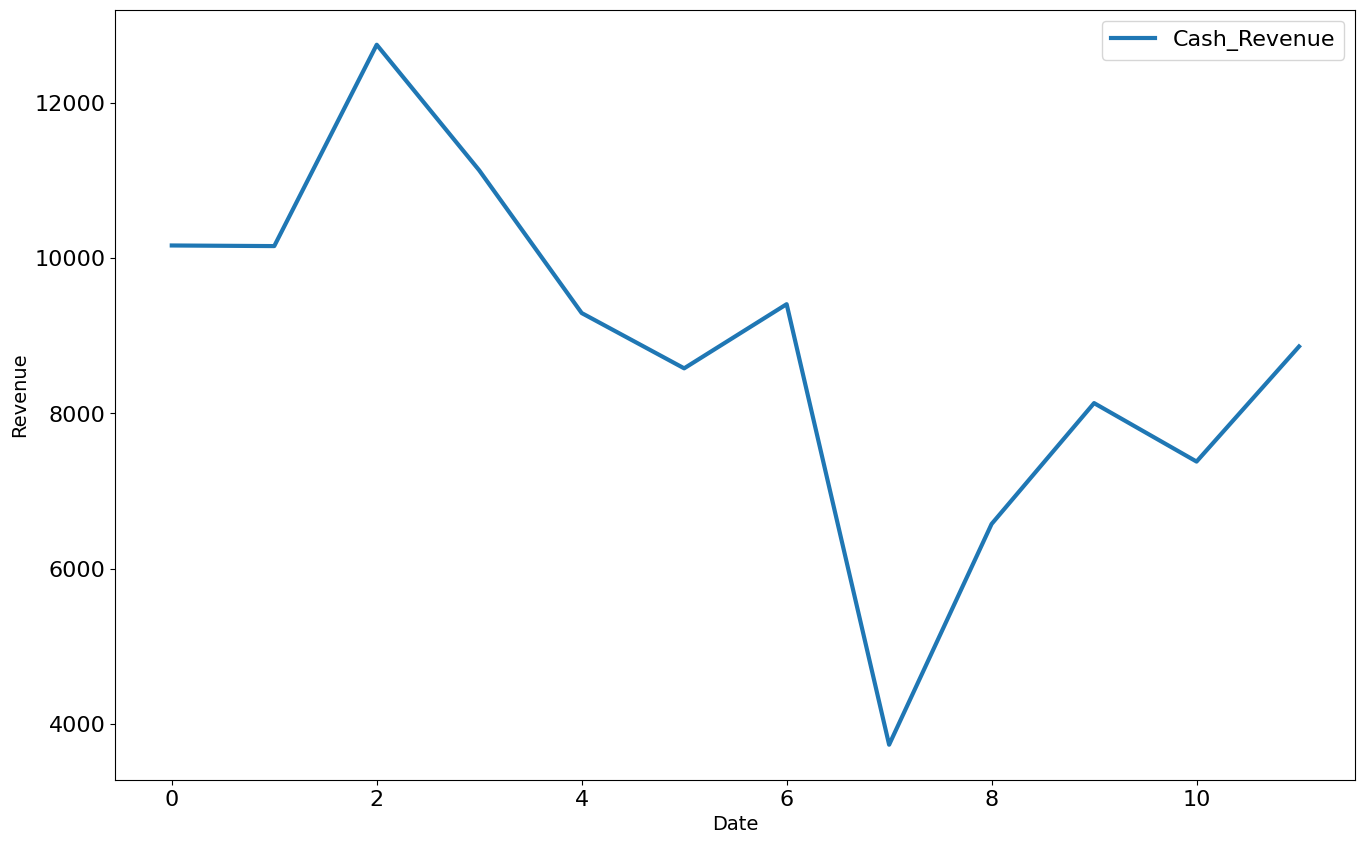

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.plot(monthly_df.index, monthly_df['Cash_Revenue'],
             linewidth=3, label=monthly_df['Cash_Revenue'].name)

plt.legend(fontsize=16)

<ipython-input-35-9ebd43102e17>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  roll_df = monthly_df.rolling(window=2).mean()


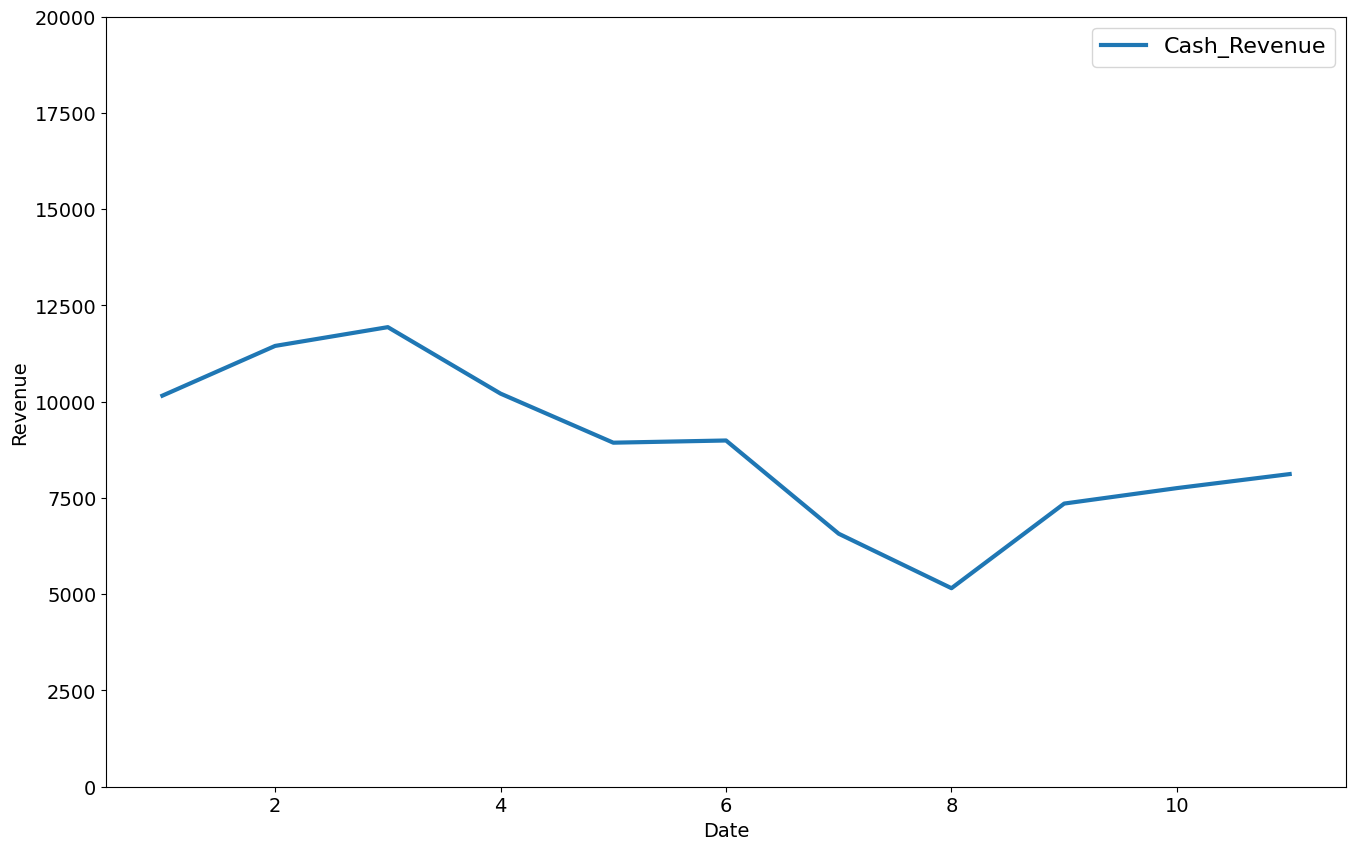

In [35]:
# The window is number of observations that are averaged
roll_df = monthly_df.rolling(window=2).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.ylim(0, 20000)
plt.plot(roll_df.index, roll_df['Cash_Revenue'],
             linewidth=3, label=roll_df['Cash_Revenue'].name)

plt.legend(fontsize=16)

In [36]:
revenue_bar = ptx.bar(x = monthly_df.index, # index = category name
             y = monthly_df.Cash_Revenue)

revenue_bar.show()